In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qadence import *

import torch
from torch.autograd import grad

### Hyperparams

In [2]:
RANDOM_STATES = [1713975870, 326790136, 1835015, 1956242607, 1927984545, 13323772, 428198875, 1591454680, 55273405, 969989966] #np.random.randint(0, 2**31-1, size=10) 
print("Seeds: ", RANDOM_STATES)
LEARNING_RATES = [0.02]
LAMBDA1 = [6] 

Seeds:  [1713975870, 326790136, 1835015, 1956242607, 1927984545, 13323772, 428198875, 1591454680, 55273405, 969989966]


### Inputs

In [3]:
def generate_chebyshev_grid(n, a, b, requires_grad=True):
    k = torch.arange(n)
    chebyshev_nodes = torch.cos(torch.pi * (2*k + 1) / (2*n))  #standard Chebyshev nodes in [-1,1]
    scaled_nodes = ((chebyshev_nodes + 1) / 2) * (b - a) + a  #rescale to [a, b]
    
    return scaled_nodes.requires_grad_(requires_grad=requires_grad)

# X train
N_POINTS = 20
a = 0.0
b = 0.9
x = generate_chebyshev_grid(N_POINTS, a, b)
print(x.detach().numpy())
cp_fixed = torch.reshape(x, (N_POINTS,1))

# X test
sample_points = generate_chebyshev_grid(100, a, b, requires_grad=False).reshape(-1, 1)

[0.8986128  0.88756646 0.86574579 0.83368807 0.79218268 0.74225162
 0.68512435 0.62220754 0.55505041 0.48530659 0.41469341 0.34494959
 0.27779246 0.21487565 0.15774838 0.10781732 0.06631193 0.03425421
 0.01243354 0.0013872 ]


### Pseudo-Exhaustive search

Seed id:  0
Learning rate:  0.02
lamb = 6
Initial angles:  [0.86300713 0.38242467 0.1889195  0.05232833 0.70440851 0.89922714
 0.25313934 0.45884452 0.39058888 0.29860438 0.83862226 0.08921861
 0.06440131 0.03699264 0.75249905 0.59057702 0.67819399 0.03179394
 0.47295956 0.7256293  0.16100623 0.83590638 0.37001792 0.96723109
 0.79843691 0.62687856 0.06416852 0.54907699 0.29466414 0.42165346
 0.28335993 0.04291218 0.34884681 0.17609978 0.86233859 0.92305716
 0.489653   0.6354754  0.51079197 0.15229116 0.21656371 0.68731303
 0.0025275  0.11846729 0.30634103 0.86815116 0.96183726 0.47588449
 0.20178919 0.64608178 0.59804758 0.02139236 0.54098048 0.97326703
 0.27340524 0.17136869 0.3178029  0.88269376 0.16772827 0.42015874
 0.34531751 0.21879597 0.7324245  0.4775374  0.93051121 0.33843897
 0.16056427 0.76562028 0.80571279 0.36328169 0.70939439 0.35673171
 0.47766811 0.52880654 0.46948868 0.05718209 0.79360297 0.66102405
 0.85006372 0.67815564 0.73625734 0.70035814 0.35381476 0.31233803
 0.

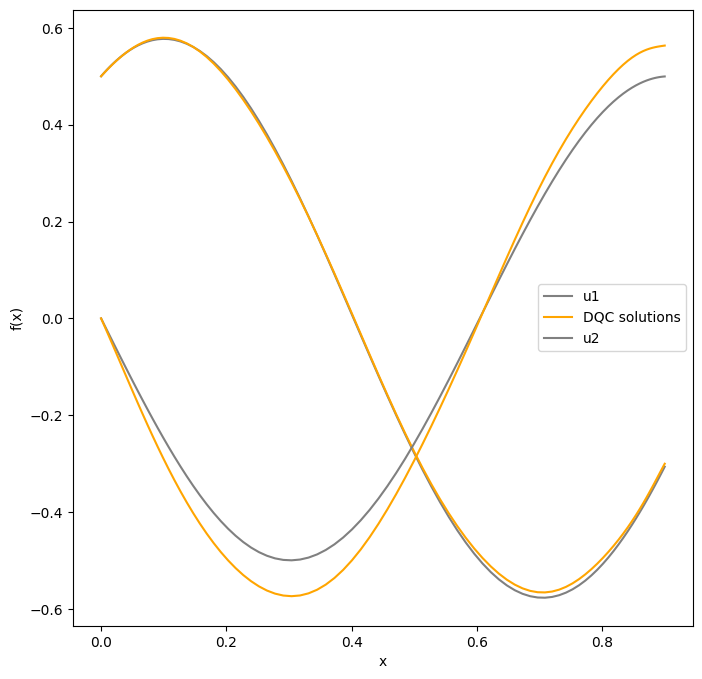

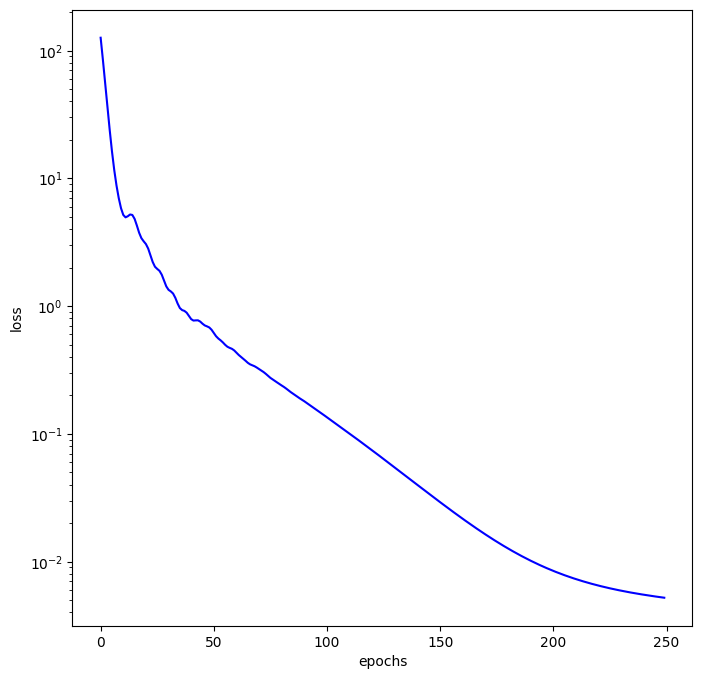

Seed id:  0
Learning rate:  0.1
lamb = 6
Initial angles:  [0.86300713 0.38242467 0.1889195  0.05232833 0.70440851 0.89922714
 0.25313934 0.45884452 0.39058888 0.29860438 0.83862226 0.08921861
 0.06440131 0.03699264 0.75249905 0.59057702 0.67819399 0.03179394
 0.47295956 0.7256293  0.16100623 0.83590638 0.37001792 0.96723109
 0.79843691 0.62687856 0.06416852 0.54907699 0.29466414 0.42165346
 0.28335993 0.04291218 0.34884681 0.17609978 0.86233859 0.92305716
 0.489653   0.6354754  0.51079197 0.15229116 0.21656371 0.68731303
 0.0025275  0.11846729 0.30634103 0.86815116 0.96183726 0.47588449
 0.20178919 0.64608178 0.59804758 0.02139236 0.54098048 0.97326703
 0.27340524 0.17136869 0.3178029  0.88269376 0.16772827 0.42015874
 0.34531751 0.21879597 0.7324245  0.4775374  0.93051121 0.33843897
 0.16056427 0.76562028 0.80571279 0.36328169 0.70939439 0.35673171
 0.47766811 0.52880654 0.46948868 0.05718209 0.79360297 0.66102405
 0.85006372 0.67815564 0.73625734 0.70035814 0.35381476 0.31233803
 0.8

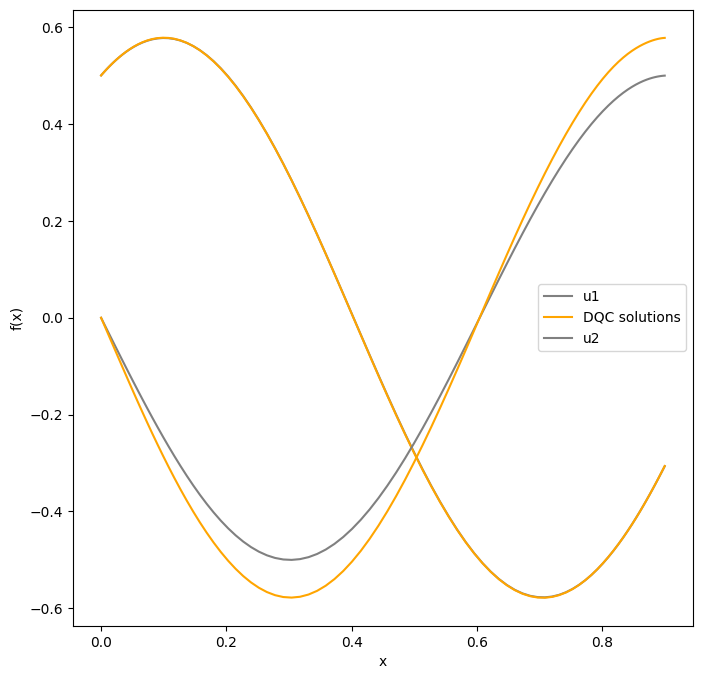

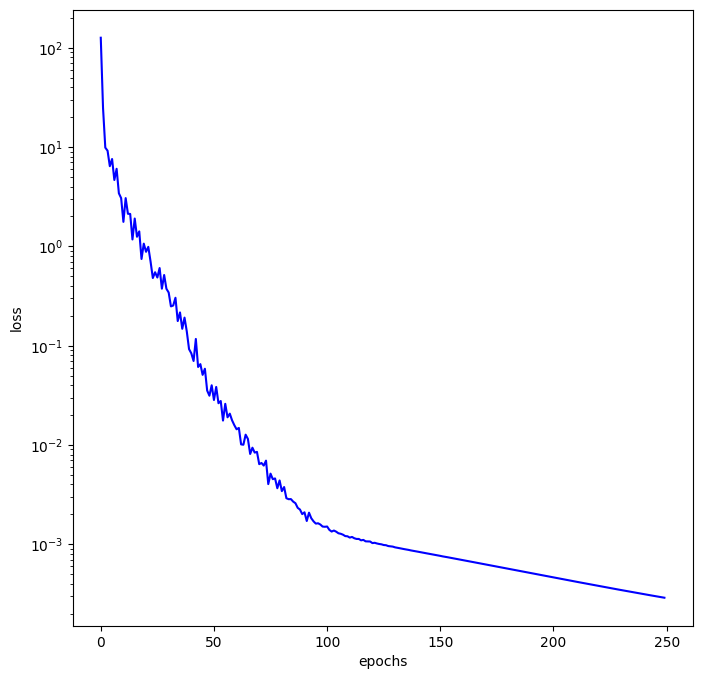

Seed id:  1
Learning rate:  0.02
lamb = 6
Initial angles:  [0.46912153 0.34663833 0.32761727 0.38628524 0.10829884 0.48521871
 0.87391431 0.71437819 0.54495349 0.36268152 0.70063173 0.65230017
 0.87591715 0.97197258 0.70612518 0.42366383 0.16035106 0.08249185
 0.76516457 0.05119116 0.79739546 0.41670674 0.52449684 0.70321299
 0.33377673 0.17281348 0.90283646 0.18272413 0.70075177 0.64243307
 0.21182258 0.73960727 0.05335567 0.00600667 0.19394184 0.20820238
 0.01706799 0.9100843  0.059324   0.35738071 0.16944905 0.72740434
 0.68655466 0.43071432 0.81652644 0.3547751  0.44310564 0.27620256
 0.39503613 0.15566664 0.42678424 0.00947916 0.68131184 0.21359426
 0.1863717  0.70532865 0.06472038 0.21716219 0.18519906 0.50894159
 0.10947877 0.01100853 0.92499269 0.79487862 0.94883102 0.37418049
 0.9757932  0.12835383 0.72781384 0.41241469 0.11511506 0.91915577
 0.66598441 0.5357263  0.0449727  0.10954549 0.79399867 0.68807441
 0.40087595 0.50354087 0.79742411 0.53072219 0.04274099 0.23717255
 0.

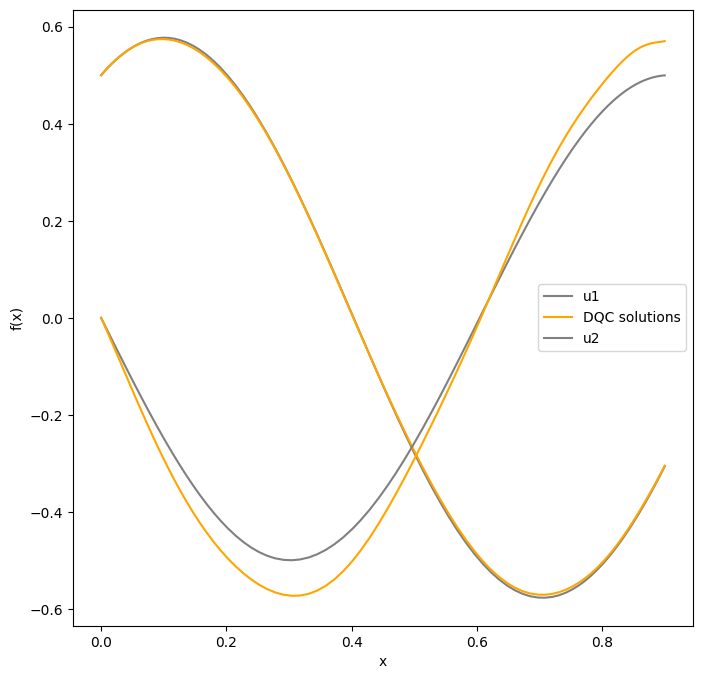

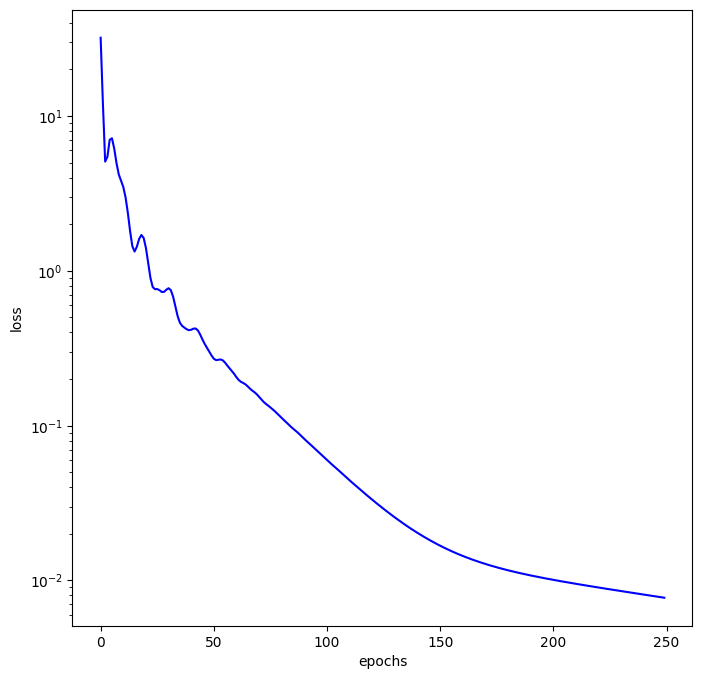

Seed id:  1
Learning rate:  0.1
lamb = 6
Initial angles:  [0.46912153 0.34663833 0.32761727 0.38628524 0.10829884 0.48521871
 0.87391431 0.71437819 0.54495349 0.36268152 0.70063173 0.65230017
 0.87591715 0.97197258 0.70612518 0.42366383 0.16035106 0.08249185
 0.76516457 0.05119116 0.79739546 0.41670674 0.52449684 0.70321299
 0.33377673 0.17281348 0.90283646 0.18272413 0.70075177 0.64243307
 0.21182258 0.73960727 0.05335567 0.00600667 0.19394184 0.20820238
 0.01706799 0.9100843  0.059324   0.35738071 0.16944905 0.72740434
 0.68655466 0.43071432 0.81652644 0.3547751  0.44310564 0.27620256
 0.39503613 0.15566664 0.42678424 0.00947916 0.68131184 0.21359426
 0.1863717  0.70532865 0.06472038 0.21716219 0.18519906 0.50894159
 0.10947877 0.01100853 0.92499269 0.79487862 0.94883102 0.37418049
 0.9757932  0.12835383 0.72781384 0.41241469 0.11511506 0.91915577
 0.66598441 0.5357263  0.0449727  0.10954549 0.79399867 0.68807441
 0.40087595 0.50354087 0.79742411 0.53072219 0.04274099 0.23717255
 0.9

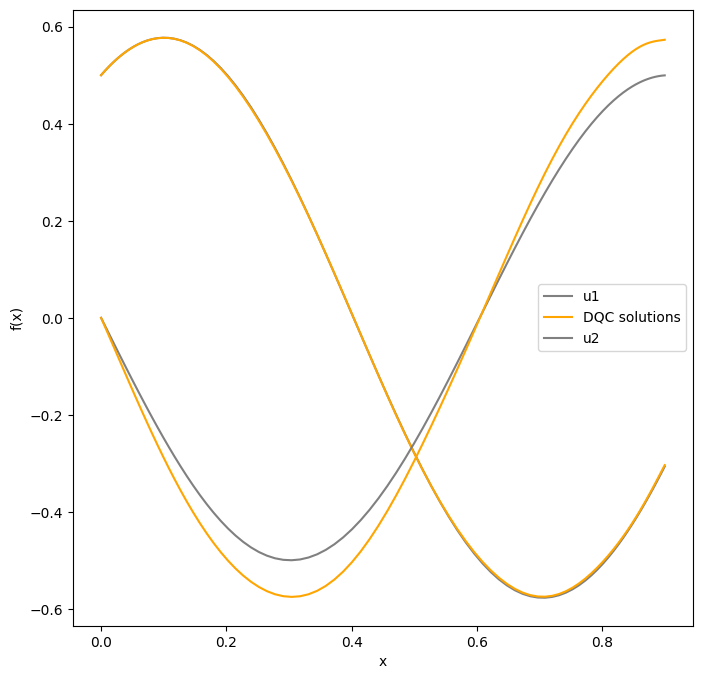

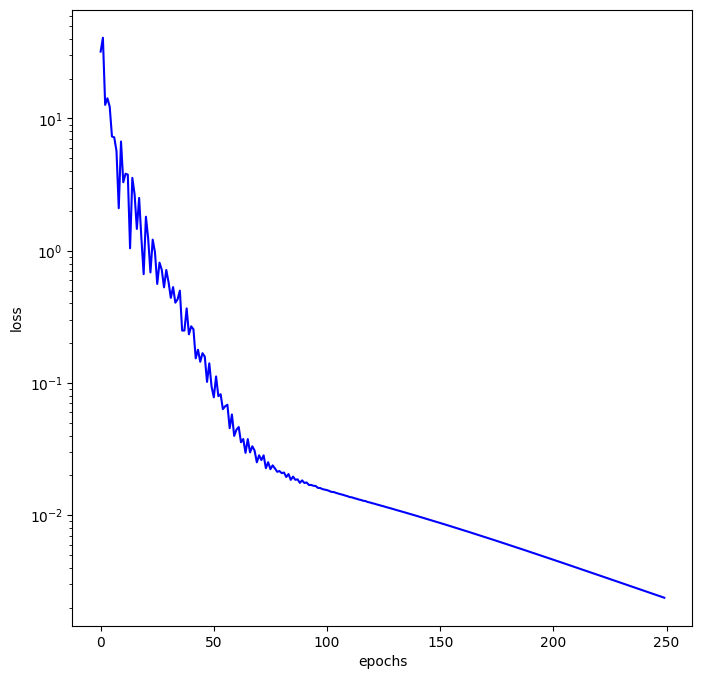

Seed id:  2
Learning rate:  0.02
lamb = 6
Initial angles:  [0.83578594 0.0598965  0.52612544 0.40876154 0.96432287 0.70018737
 0.14298313 0.98763731 0.52627555 0.31626954 0.07444336 0.03059781
 0.64418315 0.23613155 0.68905213 0.39950192 0.55902452 0.86233471
 0.44071986 0.74702211 0.10453333 0.08227745 0.11009364 0.77113464
 0.32353937 0.29137876 0.27260458 0.18242754 0.96833031 0.05183663
 0.32903591 0.90856017 0.43377464 0.46089426 0.18064318 0.53152533
 0.242025   0.77210063 0.55821722 0.5032578  0.07097317 0.63893766
 0.16264368 0.6450807  0.7166649  0.05089201 0.23230298 0.90137966
 0.05168961 0.30832278 0.22383342 0.79073622 0.45067788 0.11043179
 0.98039798 0.87930258 0.0283849  0.42438257 0.13827236 0.67829139
 0.44754157 0.08937961 0.76026032 0.59213958 0.20924465 0.16926416
 0.942448   0.67409249 0.38889519 0.93320864 0.7480413  0.82954944
 0.80366301 0.69447636 0.07055392 0.43966711 0.99904553 0.15835642
 0.47708751 0.82029233 0.07915117 0.97173818 0.57842058 0.46458166
 0.

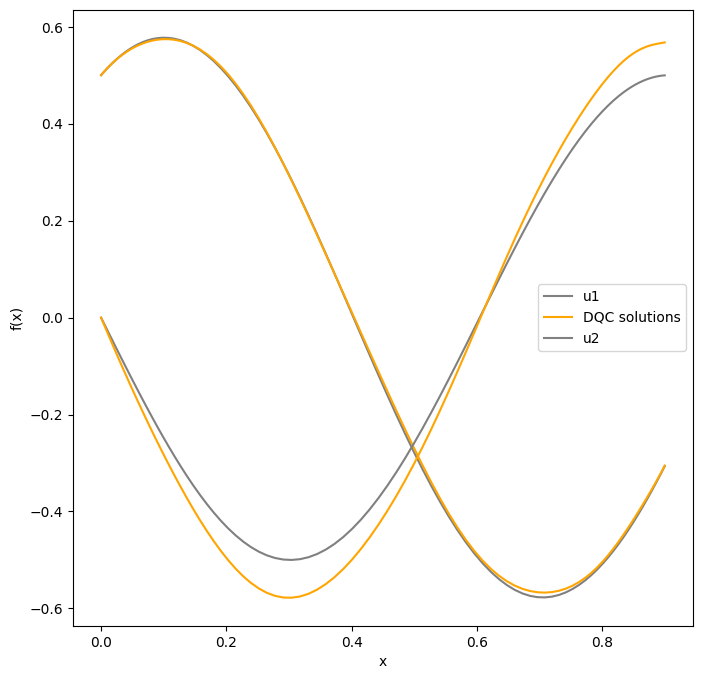

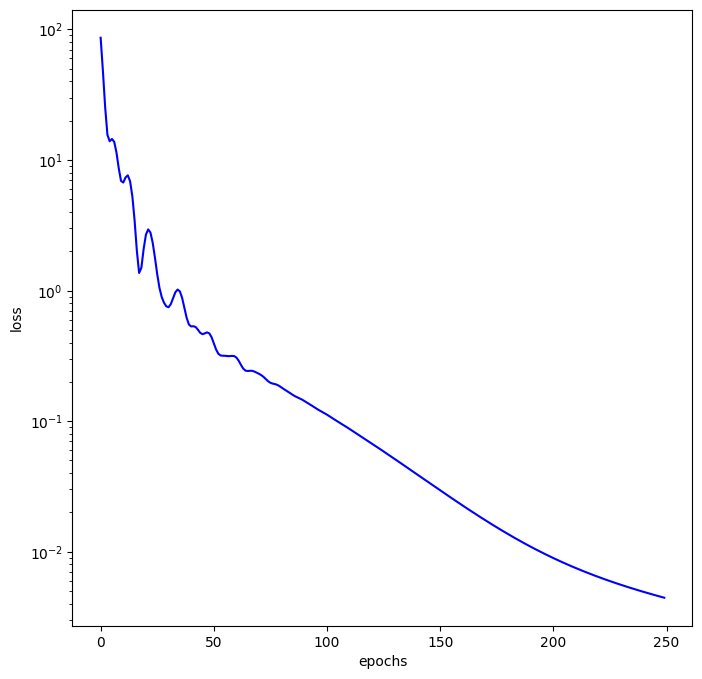

Seed id:  2
Learning rate:  0.1
lamb = 6
Initial angles:  [0.83578594 0.0598965  0.52612544 0.40876154 0.96432287 0.70018737
 0.14298313 0.98763731 0.52627555 0.31626954 0.07444336 0.03059781
 0.64418315 0.23613155 0.68905213 0.39950192 0.55902452 0.86233471
 0.44071986 0.74702211 0.10453333 0.08227745 0.11009364 0.77113464
 0.32353937 0.29137876 0.27260458 0.18242754 0.96833031 0.05183663
 0.32903591 0.90856017 0.43377464 0.46089426 0.18064318 0.53152533
 0.242025   0.77210063 0.55821722 0.5032578  0.07097317 0.63893766
 0.16264368 0.6450807  0.7166649  0.05089201 0.23230298 0.90137966
 0.05168961 0.30832278 0.22383342 0.79073622 0.45067788 0.11043179
 0.98039798 0.87930258 0.0283849  0.42438257 0.13827236 0.67829139
 0.44754157 0.08937961 0.76026032 0.59213958 0.20924465 0.16926416
 0.942448   0.67409249 0.38889519 0.93320864 0.7480413  0.82954944
 0.80366301 0.69447636 0.07055392 0.43966711 0.99904553 0.15835642
 0.47708751 0.82029233 0.07915117 0.97173818 0.57842058 0.46458166
 0.4

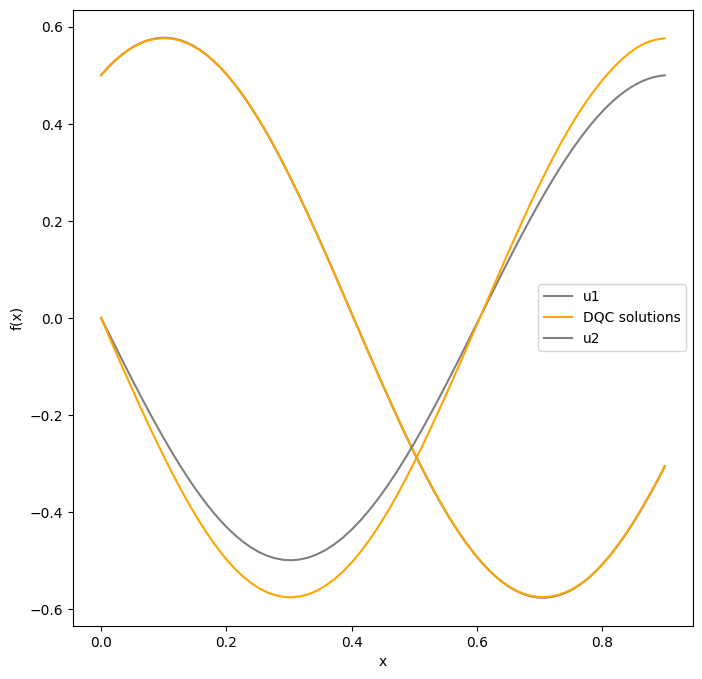

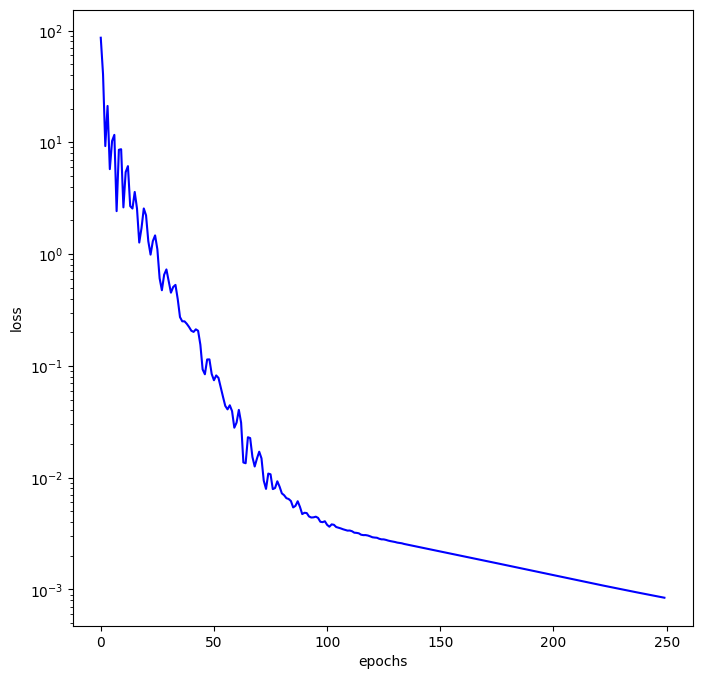

Seed id:  3
Learning rate:  0.02
lamb = 6
Initial angles:  [0.78293388 0.26623822 0.8334723  0.40448486 0.75563903 0.38011172
 0.01593202 0.36376867 0.32057789 0.59088096 0.75122447 0.20641212
 0.90932244 0.53685688 0.71469315 0.03231914 0.41986585 0.639948
 0.71951657 0.58686425 0.10378263 0.53998324 0.59888424 0.54977012
 0.06747501 0.15559747 0.46648555 0.34065424 0.78865224 0.26129562
 0.61966868 0.96557719 0.63541384 0.50919556 0.13811136 0.68574593
 0.77334214 0.18666517 0.05454273 0.97397392 0.61506667 0.77676681
 0.95066091 0.11002165 0.43926088 0.49658164 0.92370471 0.83954331
 0.39191163 0.09588823 0.51269159 0.86956104 0.47856848 0.87469477
 0.2040385  0.97096897 0.61489914 0.86972341 0.56612588 0.38721167
 0.19678823 0.86181596 0.67025226 0.67201251 0.58833946 0.74860126
 0.12068746 0.81897774 0.58860322 0.56430596 0.36464458 0.94640935
 0.04246032 0.2607615  0.20523472 0.04322487 0.00653253 0.47297965
 0.06795747 0.51282508 0.92660969 0.55767445 0.51491024 0.23265365
 0.59

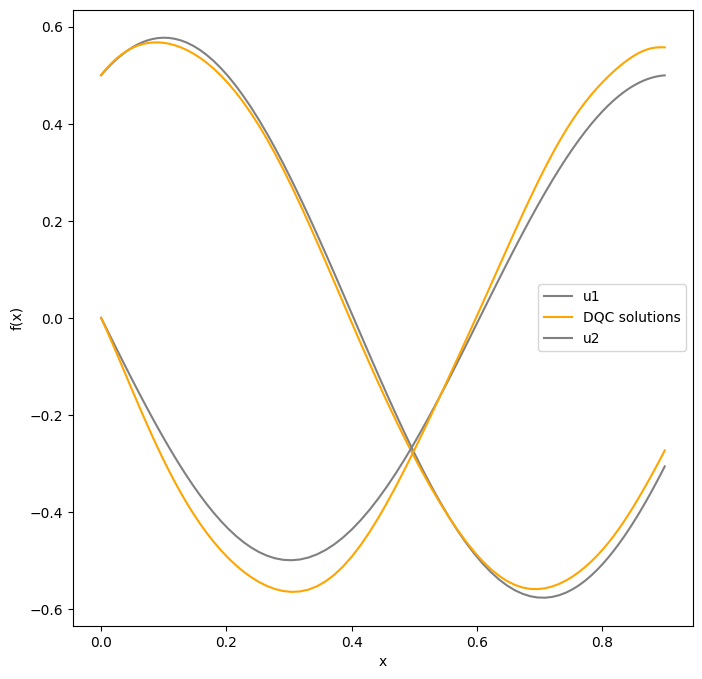

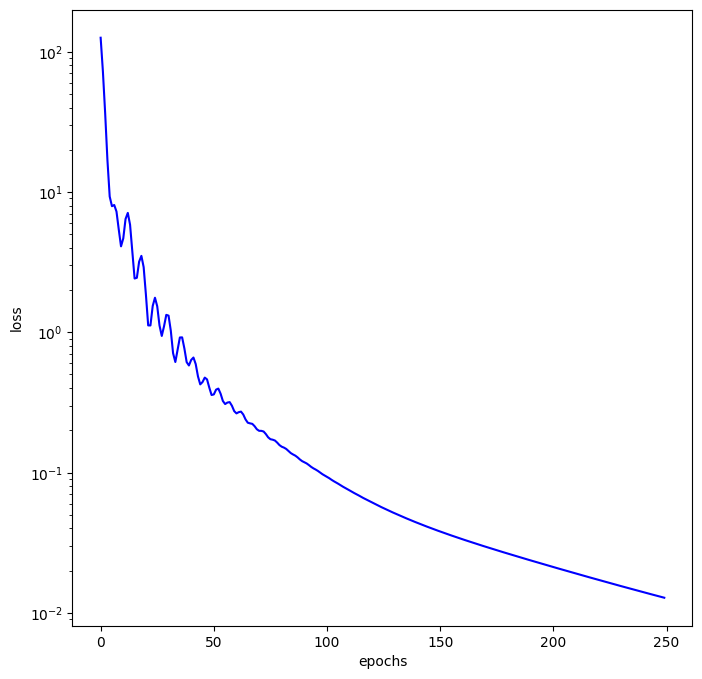

Seed id:  3
Learning rate:  0.1
lamb = 6
Initial angles:  [0.78293388 0.26623822 0.8334723  0.40448486 0.75563903 0.38011172
 0.01593202 0.36376867 0.32057789 0.59088096 0.75122447 0.20641212
 0.90932244 0.53685688 0.71469315 0.03231914 0.41986585 0.639948
 0.71951657 0.58686425 0.10378263 0.53998324 0.59888424 0.54977012
 0.06747501 0.15559747 0.46648555 0.34065424 0.78865224 0.26129562
 0.61966868 0.96557719 0.63541384 0.50919556 0.13811136 0.68574593
 0.77334214 0.18666517 0.05454273 0.97397392 0.61506667 0.77676681
 0.95066091 0.11002165 0.43926088 0.49658164 0.92370471 0.83954331
 0.39191163 0.09588823 0.51269159 0.86956104 0.47856848 0.87469477
 0.2040385  0.97096897 0.61489914 0.86972341 0.56612588 0.38721167
 0.19678823 0.86181596 0.67025226 0.67201251 0.58833946 0.74860126
 0.12068746 0.81897774 0.58860322 0.56430596 0.36464458 0.94640935
 0.04246032 0.2607615  0.20523472 0.04322487 0.00653253 0.47297965
 0.06795747 0.51282508 0.92660969 0.55767445 0.51491024 0.23265365
 0.596

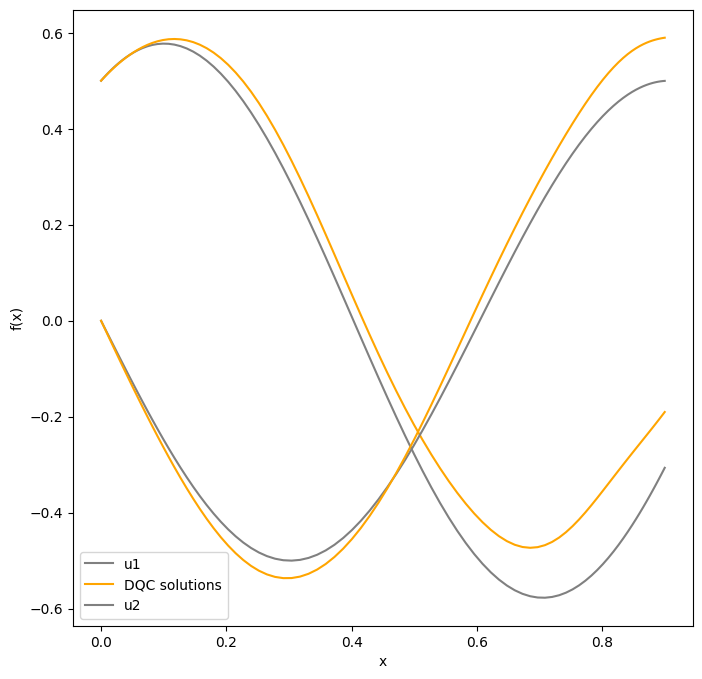

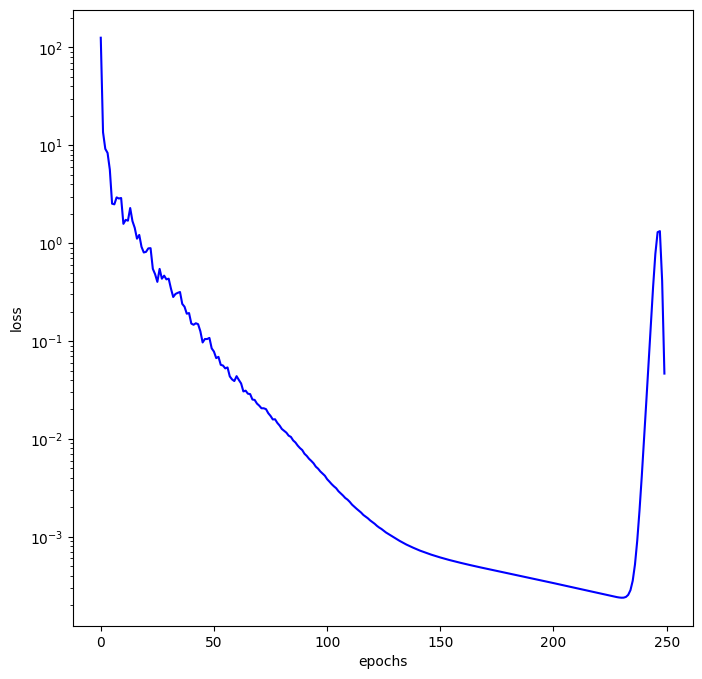

Seed id:  4
Learning rate:  0.02
lamb = 6
Initial angles:  [0.31907926 0.01973581 0.61113732 0.9100611  0.85320135 0.79825343
 0.41339567 0.25043343 0.36421991 0.64780433 0.34649318 0.96738935
 0.64506174 0.570485   0.20568775 0.16772963 0.61757789 0.46136822
 0.53061196 0.50146139 0.59412702 0.75702286 0.77050728 0.47512852
 0.28668885 0.61768404 0.51010329 0.08219678 0.24316737 0.91890615
 0.67552539 0.53932279 0.39674745 0.22855867 0.57237234 0.63497295
 0.67010549 0.34218621 0.27306572 0.11211137 0.21286069 0.58114034
 0.45496353 0.05546646 0.53515311 0.7574576  0.74587193 0.6070213
 0.64656038 0.10278545 0.31472543 0.37093506 0.47112781 0.09506395
 0.04578569 0.20210876 0.64583976 0.90503028 0.28778992 0.15075543
 0.69203522 0.19239842 0.75037935 0.10958467 0.36340947 0.83882156
 0.37751722 0.73415829 0.93329283 0.04819838 0.0612974  0.13764743
 0.2510969  0.89351545 0.63976835 0.821312   0.3126983  0.33043985
 0.25954468 0.71382456 0.4692604  0.14302606 0.56705247 0.06270002
 0.2

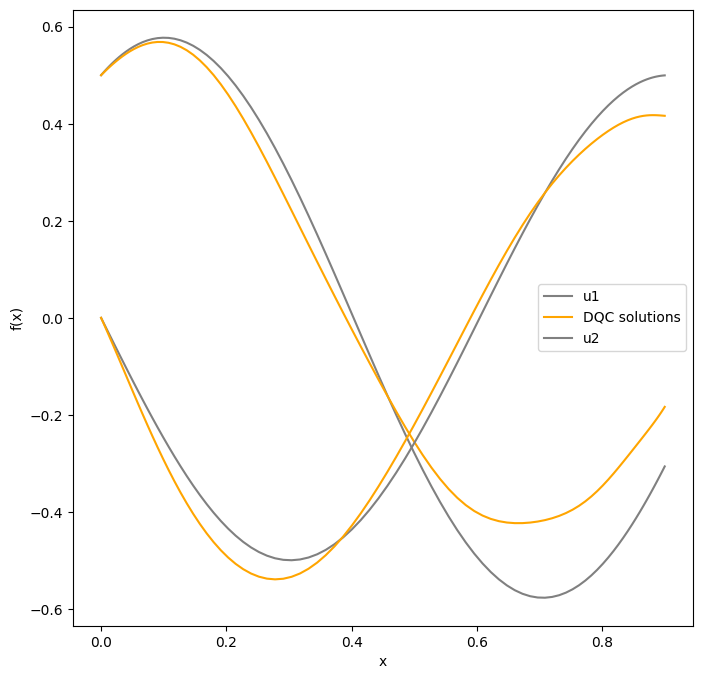

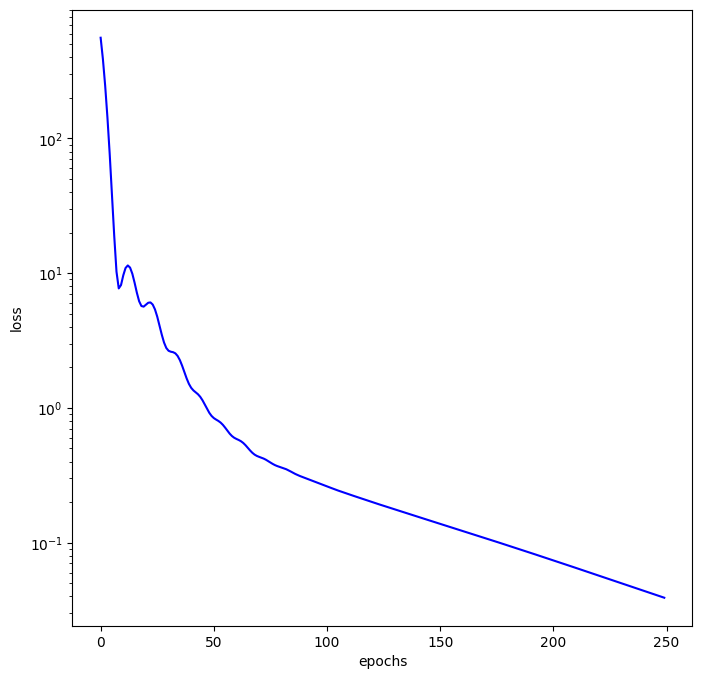

Seed id:  4
Learning rate:  0.1
lamb = 6
Initial angles:  [0.31907926 0.01973581 0.61113732 0.9100611  0.85320135 0.79825343
 0.41339567 0.25043343 0.36421991 0.64780433 0.34649318 0.96738935
 0.64506174 0.570485   0.20568775 0.16772963 0.61757789 0.46136822
 0.53061196 0.50146139 0.59412702 0.75702286 0.77050728 0.47512852
 0.28668885 0.61768404 0.51010329 0.08219678 0.24316737 0.91890615
 0.67552539 0.53932279 0.39674745 0.22855867 0.57237234 0.63497295
 0.67010549 0.34218621 0.27306572 0.11211137 0.21286069 0.58114034
 0.45496353 0.05546646 0.53515311 0.7574576  0.74587193 0.6070213
 0.64656038 0.10278545 0.31472543 0.37093506 0.47112781 0.09506395
 0.04578569 0.20210876 0.64583976 0.90503028 0.28778992 0.15075543
 0.69203522 0.19239842 0.75037935 0.10958467 0.36340947 0.83882156
 0.37751722 0.73415829 0.93329283 0.04819838 0.0612974  0.13764743
 0.2510969  0.89351545 0.63976835 0.821312   0.3126983  0.33043985
 0.25954468 0.71382456 0.4692604  0.14302606 0.56705247 0.06270002
 0.28

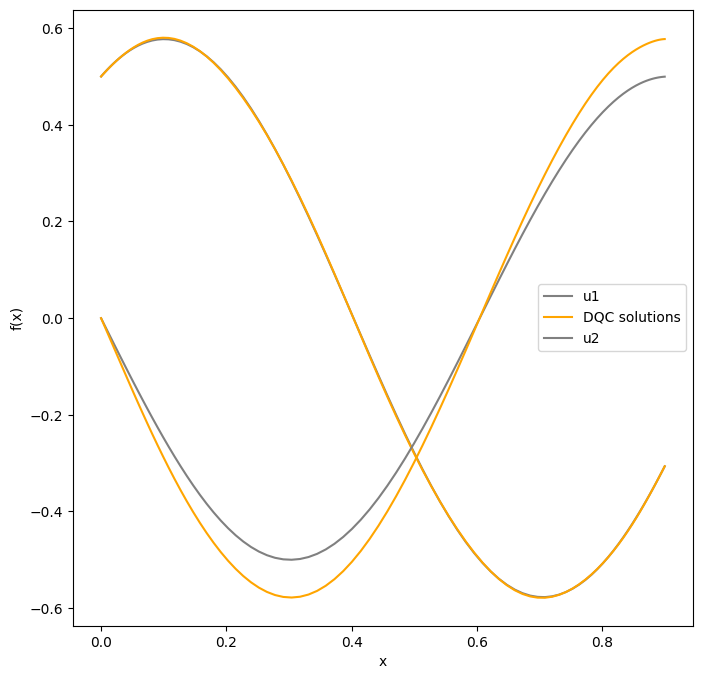

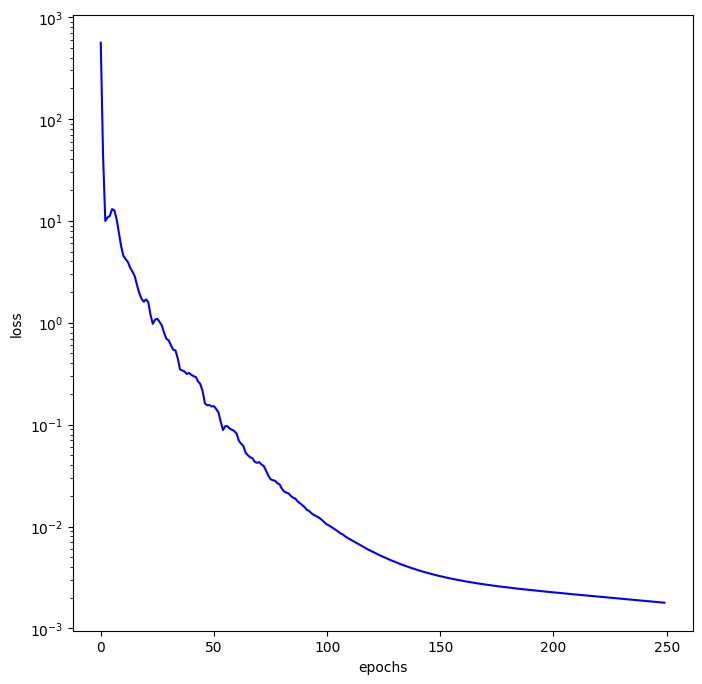

Seed id:  5
Learning rate:  0.02
lamb = 6
Initial angles:  [3.25401247e-01 9.94755702e-01 7.99094987e-01 6.94614553e-02
 4.88928971e-01 7.85742469e-01 5.10254198e-01 5.56451410e-01
 5.83565944e-01 1.93640193e-03 7.68526570e-01 4.77730238e-02
 8.02992196e-01 9.88515743e-01 8.14501597e-01 8.10788942e-01
 6.53976242e-01 9.96237243e-01 1.54734418e-01 5.82701877e-01
 1.44580057e-01 2.73796371e-01 5.79983781e-02 2.89982796e-01
 4.58994159e-01 5.41813980e-01 9.09992671e-01 3.06694737e-01
 3.99236277e-01 4.42762563e-01 7.86812746e-01 5.93774756e-01
 5.77691802e-01 9.82876343e-01 3.06987566e-01 6.54591023e-01
 6.96615257e-01 7.51164665e-01 4.96345117e-01 6.21541780e-01
 3.60693168e-01 3.83950394e-01 3.52567969e-01 5.51643383e-01
 8.36291472e-01 4.16570056e-02 5.93814285e-01 5.16192407e-02
 7.83953985e-01 8.19253564e-01 2.16599956e-01 1.58138430e-02
 2.85671177e-01 1.02542120e-01 3.69336271e-04 9.10512893e-01
 8.08664565e-01 4.46709898e-01 5.23290071e-01 3.59675631e-01
 3.20444131e-01 6.15752736

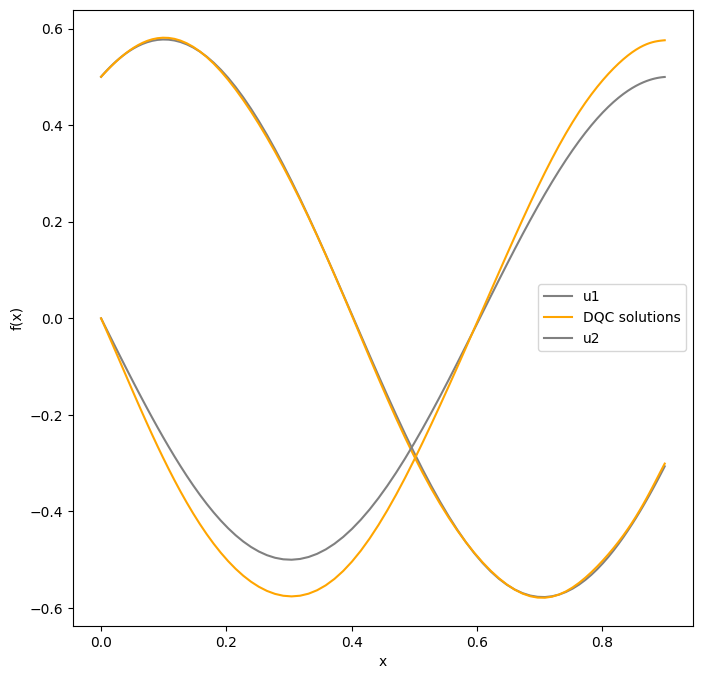

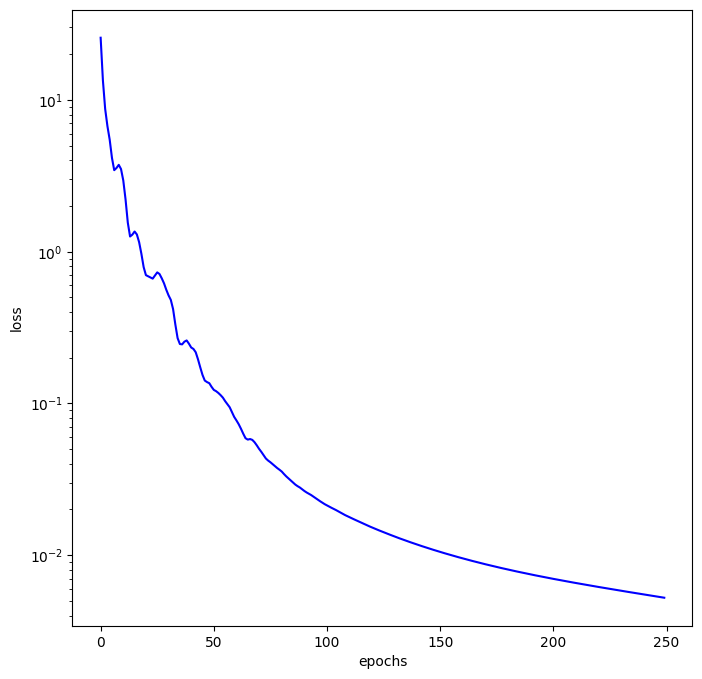

Seed id:  5
Learning rate:  0.1
lamb = 6
Initial angles:  [3.25401247e-01 9.94755702e-01 7.99094987e-01 6.94614553e-02
 4.88928971e-01 7.85742469e-01 5.10254198e-01 5.56451410e-01
 5.83565944e-01 1.93640193e-03 7.68526570e-01 4.77730238e-02
 8.02992196e-01 9.88515743e-01 8.14501597e-01 8.10788942e-01
 6.53976242e-01 9.96237243e-01 1.54734418e-01 5.82701877e-01
 1.44580057e-01 2.73796371e-01 5.79983781e-02 2.89982796e-01
 4.58994159e-01 5.41813980e-01 9.09992671e-01 3.06694737e-01
 3.99236277e-01 4.42762563e-01 7.86812746e-01 5.93774756e-01
 5.77691802e-01 9.82876343e-01 3.06987566e-01 6.54591023e-01
 6.96615257e-01 7.51164665e-01 4.96345117e-01 6.21541780e-01
 3.60693168e-01 3.83950394e-01 3.52567969e-01 5.51643383e-01
 8.36291472e-01 4.16570056e-02 5.93814285e-01 5.16192407e-02
 7.83953985e-01 8.19253564e-01 2.16599956e-01 1.58138430e-02
 2.85671177e-01 1.02542120e-01 3.69336271e-04 9.10512893e-01
 8.08664565e-01 4.46709898e-01 5.23290071e-01 3.59675631e-01
 3.20444131e-01 6.15752736e

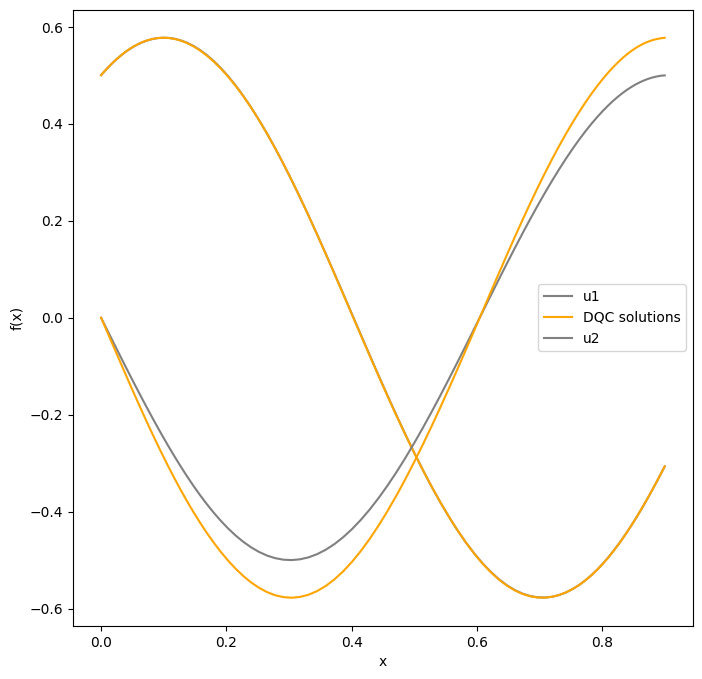

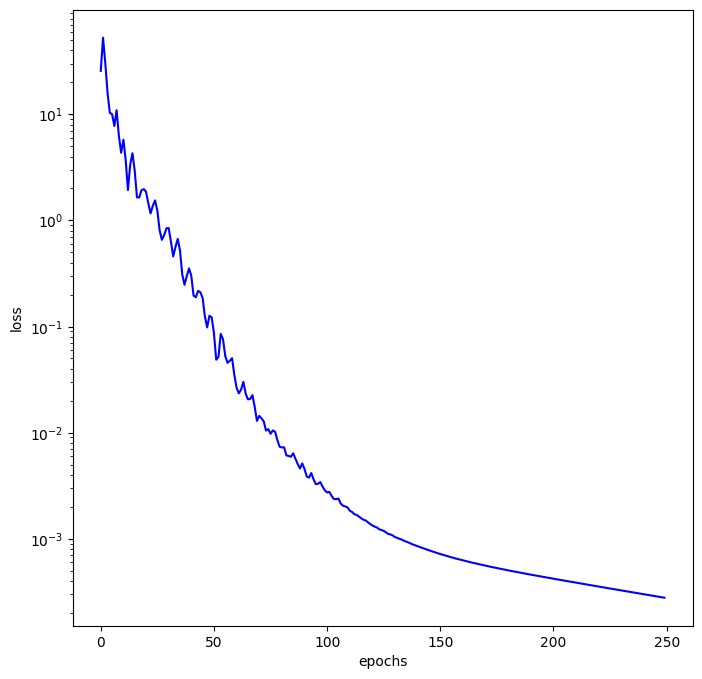

Seed id:  6
Learning rate:  0.02
lamb = 6
Initial angles:  [0.67409261 0.79046628 0.38716269 0.37830275 0.44665819 0.15949143
 0.19399567 0.63780952 0.17385789 0.52781399 0.52749158 0.08927332
 0.76886323 0.23081042 0.61474058 0.44816377 0.59146295 0.99983807
 0.89090639 0.44874079 0.8376841  0.07985974 0.33726972 0.62040408
 0.61598678 0.94295962 0.63155956 0.0017992  0.26971112 0.06165367
 0.88528393 0.10640233 0.91440853 0.90536955 0.83461886 0.37264153
 0.13865278 0.40112096 0.58396423 0.79755852 0.16761576 0.78747181
 0.11933802 0.36201461 0.74035069 0.85508463 0.66062865 0.36974881
 0.30454135 0.01240395 0.45513446 0.70444161 0.80802396 0.9010645
 0.92574943 0.3574402  0.16628719 0.62716081 0.82840357 0.06593238
 0.45679219 0.21547189 0.05713556 0.34225171 0.97348361 0.08791946
 0.76254393 0.08966388 0.08537282 0.91466741 0.56567891 0.75593826
 0.04493316 0.30223296 0.18111261 0.90852055 0.26112635 0.56194414
 0.36378869 0.5607959  0.6002005  0.25162214 0.54018445 0.39701637
 0.5

KeyboardInterrupt: 

In [4]:
L_f = []
L_q = []
all_functions = []
all_losses = []
for state in range(len(RANDOM_STATES)):
    for lr in LEARNING_RATES:
        for lamb1 in LAMBDA1:
            print("Seed id: ",state)
            print("Learning rate: ",lr)
            print("lamb =",lamb1)


            ## SETTINGS ## 
            N_QUBITS, DEPTH, LEARNING_RATE, N_POINTS = 6, 5, lr, N_POINTS
            lamb2 = 3
            b1 = 0.5
            b2 = 0

            chebT = feature_map(n_qubits=N_QUBITS, param="x", op=RY, fm_type = BasisSet.CHEBYSHEV, reupload_scaling = ReuploadScaling.TOWER)
            fm = chebT

            torch.manual_seed(RANDOM_STATES[state])
            ansatz = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])
            torch.manual_seed(RANDOM_STATES[state]) #TRY WITHOUT!
            ansatz2 = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])

            obs = total_magnetization(N_QUBITS) 
            obs2 = total_magnetization(N_QUBITS)

            circuit = QuantumCircuit(N_QUBITS, chain(fm, ansatz))
            circuit2 = QuantumCircuit(N_QUBITS, chain(fm, ansatz2))
            model = QNN(circuit=circuit, observable=obs, inputs=["x"])
            model2 = QNN(circuit=circuit2, observable=obs2, inputs=["x"])

            inital_vparams = model.vparams
            #print("Inital params: ",inital_vparams)
            sorted_keys = sorted(inital_vparams.keys(), key=lambda k: int(k.split('_')[1]))
            inital_thetas = np.array([inital_vparams[k].item() for k in sorted_keys])
            inital_thetas = np.reshape(inital_thetas, (DEPTH, 3, N_QUBITS))
            Theta_init = np.transpose(inital_thetas, (2, 0, 1))
            theta_init = Theta_init.reshape(-1)
            print("Initial angles: ",theta_init)
            #check
            #Theta_init = np.reshape(theta_init, (N_QUBITS,DEPTH,3))
            #print("Theta: ",Theta_init)
            inital_vparams2 = model2.vparams
            #print("Inital params 2: ",inital_vparams2)
            sorted_keys2 = sorted(inital_vparams2.keys(), key=lambda k: int(k.split('_')[1]))
            inital_thetas2 = np.array([inital_vparams2[k].item() for k in sorted_keys2])
            inital_thetas2 = np.reshape(inital_thetas2, (DEPTH, 3, N_QUBITS))
            Theta_init2 = np.transpose(inital_thetas2, (2, 0, 1))
            theta_init2 = Theta_init2.reshape(-1)
            print("Init angles 2: ",theta_init2)
            #check
            #Theta_init2 = np.reshape(theta_init2, (N_QUBITS,DEPTH,3))
            #print("Theta 2: ",Theta_init2)

            def loss_fn(inputs: torch.tensor, outputs: torch.tensor, outputs2: torch.tensor) -> torch.tensor:
                boundary_loss = b1*torch.ones_like(inputs) - model(torch.zeros_like(inputs))
                outputs = outputs + boundary_loss
                boundary_loss2 = b2*torch.ones_like(inputs) - model2(torch.zeros_like(inputs))
                outputs2 = outputs2 + boundary_loss2

                df = grad(outputs=outputs.sum(), inputs=inputs, create_graph=True)[0] 
                g = -lamb1*outputs2 - lamb2*outputs
                ode_loss = (df+g).pow(2)
                df2 = grad(outputs=outputs2.sum(), inputs=inputs, create_graph=True)[0] 
                g2 = lamb2*outputs2 + lamb1*outputs
                ode_loss2 = (df2+g2).pow(2)
    
                return ode_loss.mean() + ode_loss2.mean(), outputs, outputs2 


            ## TRAINING ##
            epochs = 250
            opt = torch.optim.Adam(list(model.parameters()) + list(model2.parameters()), lr=LEARNING_RATE)
            losses = []
            for epoch in range(epochs):
                opt.zero_grad()
                
                cp = cp_fixed.clone().detach().requires_grad_(True)
                
                loss, f1, f2 = loss_fn(inputs=cp, outputs=model(cp), outputs2=model2(cp))
                losses.append(loss.item())
            
                if (epoch % 50 == 0):
                    sqrt_3 = torch.sqrt(torch.tensor(3.0))
                    omega = 3 * sqrt_3          
                    u1 = (0.5 * torch.cos(omega * cp.detach()) + (1 / (2 * sqrt_3)) * torch.sin(omega * cp.detach()))
                    u2 = -0.5 * torch.sin(omega * cp.detach())
                    #u1 = 0.5*torch.ones_like(cp.detach()) + 1.5*cp.detach()
                    #u2 = -1.5*cp.detach()
                    l_q1 = torch.sum((u1-f1.detach().numpy())**2)/N_POINTS
                    l_q2 = torch.sum((u2-f2.detach().numpy())**2)/N_POINTS
                    print(epoch, (loss.item(), l_q1.item(), l_q2.item()))

                loss.backward()
                opt.step()


            ## TESTING ## 
            sqrt_3 = torch.sqrt(torch.tensor(3.0))
            omega = 3 * sqrt_3  # 3√3
            analytic_sol1 = (0.5 * torch.cos(omega * sample_points) + (1 / (2 * sqrt_3)) * torch.sin(omega * sample_points))
            analytic_sol2 = -0.5 * torch.sin(omega * sample_points)  
            #analytic_sol1 = 0.5*torch.ones_like(sample_points) + 1.5*sample_points
            #analytic_sol2 = -1.5*sample_points
            dqc_sol1 = (model(sample_points) + b1*torch.ones_like(sample_points)-model(torch.zeros_like(sample_points))).detach().numpy() 
            dqc_sol2 = (model2(sample_points) + b2*torch.ones_like(sample_points)-model2(torch.zeros_like(sample_points))).detach().numpy() 
            x_data = sample_points.detach().numpy()

            plt.figure(figsize=(8, 8))
            plt.plot(x_data, analytic_sol1.flatten(), color="gray", label="u1")
            plt.plot(x_data, dqc_sol1.flatten(), color="orange", label="DQC solutions")
            plt.plot(x_data, analytic_sol2.flatten(), color="gray", label="u2")
            plt.plot(x_data, dqc_sol2.flatten(), color="orange")
            plt.xlabel("x")
            plt.ylabel("f(x)")
            plt.legend()
            #plt.savefig(f"f_x_{state}_{lr}_{lamb}.png")
            plt.show()

            plt.figure(figsize=(8, 8))
            plt.plot(losses, color="blue")
            plt.xlabel("epochs")
            plt.ylabel("loss")
            plt.yscale('log')
            #plt.savefig(f"losses_{state}_{lr}_{lamb}.png")
            plt.show()
            
            L_f.append(losses[-1])
            L_q.append((torch.sum((analytic_sol1-dqc_sol1)**2)/len(sample_points), torch.sum((analytic_sol2-dqc_sol2)**2)/len(sample_points)))
            all_functions.append((dqc_sol1.flatten(), dqc_sol2.flatten()))
            all_losses.append(losses)

In [ ]:
print("L_f: ",L_f)
print()
L_q = [(q1.item(), q2.item()) for q1, q2 in L_q]
print("L_q: ",L_q)

L_f:  [0.005216727187547075, 0.007725901508608909, 0.0044506834938014845, 0.012809629336171845, 0.03899378714918701, 0.005243617360605083, 0.007675503404758689, 0.0017271167486214273, 0.011795121701813828, 0.004881734323601138]

L_q:  [(4.488282457774026e-05, 0.0024027916344777876), (1.2050148837339346e-05, 0.0026119125146643473), (2.1366730846245195e-05, 0.0025388904118003124), (0.0003740343929667846, 0.0022886318028388203), (0.008938154556419359, 0.0020765129293542446), (1.3603011107864464e-05, 0.0030028684025004827), (1.1188896511828655e-05, 0.0027040792721741403), (0.00011658955605340053, 0.0024044330701761176), (0.0003720514417941058, 0.0016612461392446147), (5.6282486600666025e-05, 0.002448690065466399)]


### Best solutions

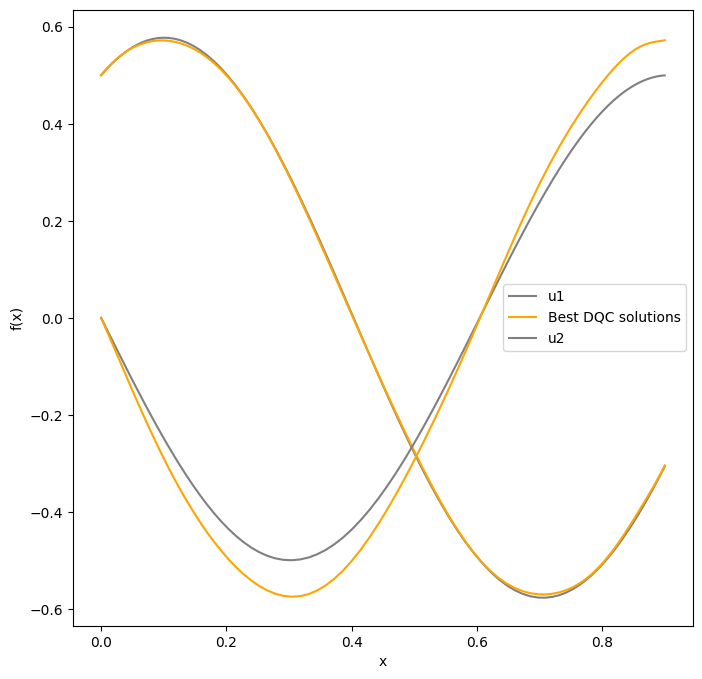

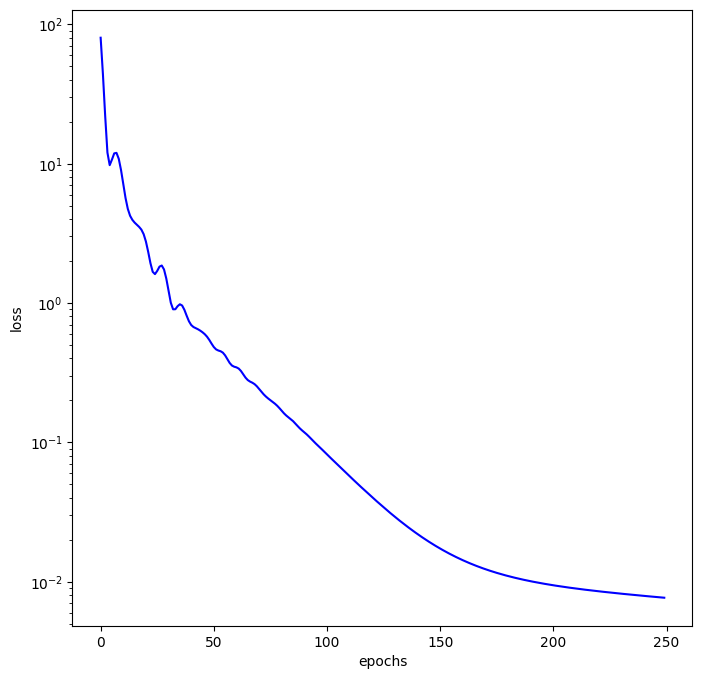


Top 10 indices (sorted by L_q1 and L_q2): 
1. Index 6, L_f = 0.007676, L_q1 = 0.000011, L_q2 = 0.002704
2. Index 1, L_f = 0.007726, L_q1 = 0.000012, L_q2 = 0.002612
3. Index 5, L_f = 0.005244, L_q1 = 0.000014, L_q2 = 0.003003
4. Index 2, L_f = 0.004451, L_q1 = 0.000021, L_q2 = 0.002539
5. Index 0, L_f = 0.005217, L_q1 = 0.000045, L_q2 = 0.002403
6. Index 9, L_f = 0.004882, L_q1 = 0.000056, L_q2 = 0.002449
7. Index 7, L_f = 0.001727, L_q1 = 0.000117, L_q2 = 0.002404
8. Index 8, L_f = 0.011795, L_q1 = 0.000372, L_q2 = 0.001661
9. Index 3, L_f = 0.012810, L_q1 = 0.000374, L_q2 = 0.002289
10. Index 4, L_f = 0.038994, L_q1 = 0.008938, L_q2 = 0.002077


In [ ]:
# Step 1: Collect all entries
all_entries = [(i, L_f[i], L_q[i][0], L_q[i][1],) for i in range(len(L_q))]

# Step 2: Sort by L_q only
top_10 = sorted(all_entries, key=lambda x: (x[2], x[3]))[:10]

# Step 3: Use the best one (lowest L_q) for plotting
best_index = top_10[0][0]
best_L_f = top_10[0][1]
best_L_q1 = top_10[0][2]
best_L_q2 = top_10[0][3]
best_solution1, best_solution2 = all_functions[best_index]
best_loss = all_losses[best_index]

plt.figure(figsize=(8, 8))
plt.plot(x_data, analytic_sol1.flatten(), color="gray", label="u1")
plt.plot(x_data, best_solution1.flatten(), color="orange", label="Best DQC solutions")
plt.plot(x_data, analytic_sol2.flatten(), color="gray", label="u2")
plt.plot(x_data, best_solution2.flatten(), color="orange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig("best_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(best_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log')
plt.savefig("best_losses.png")
plt.show()

# Print top 10 indices
print("\nTop 10 indices (sorted by L_q1 and L_q2): ")
for rank, (i, lf, lq1, lq2) in enumerate(top_10, 1):
    print(f"{rank}. Index {i}, L_f = {lf:.6f}, L_q1 = {lq1:.6f}, L_q2 = {lq2:.6f}")


### Stats

In [ ]:
L_f_threshold = 10**(-2)
L_q_threshold = 10**(-4) 
count = sum(1 for f, q in zip(L_f, L_q) if f < L_f_threshold and q[0] < L_q_threshold and q[1] < L_q_threshold)

print("Number of good solutions: ",count) 

Number of good solutions:  0


In [ ]:
print("Number of good L_f: ",sum(1 for f in L_f if f < L_f_threshold)) 
print("Number of good L_q: ",sum(1 for q in L_q if q[0] < L_q_threshold and q[1] < L_q_threshold))

Number of good L_f:  7
Number of good L_q:  0
